In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [3]:
data =  pd.read_csv('/kaggle/input/blog-authorship-corpus/blogtext.csv')

In [4]:
new_data = data.head(1000)

In [5]:
new_data.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [6]:
def remove_unwanted_characters(text):
    # Remove non-alphanumeric characters and symbols
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return cleaned_text
def convert_to_lowercase(text):
    # Convert text to lowercase
    lowercase_text = text.lower()
    return lowercase_text
def remove_unwanted_spaces(text):
    # Remove extra whitespaces
    cleaned_text = ' '.join(text.split())
    return cleaned_text

# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
def remove_stopwords(text):
    # Tokenize the text and remove stopwords
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    cleaned_text = ' '.join(filtered_words)
    return cleaned_text

In [8]:
new_data['text'] = new_data['text'].apply(remove_unwanted_characters)
new_data['text'] = new_data['text'].apply(convert_to_lowercase)
new_data['text'] = new_data['text'].apply(remove_unwanted_spaces)
new_data['text'] = new_data['text'].apply(remove_stopwords)

In [10]:


# print(classification_report(y_test,y_pred))
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
le_gender = LabelEncoder()
new_data['gender_encoded'] = le_gender.fit_transform(new_data['gender'])

# Features (text data) and labels
X = new_data['text']
y = new_data['gender_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Count Vectorizer with ngram_range=(1, 2)
vectorizer = CountVectorizer(ngram_range=(1, 2))

# Vectorize training features
X_train_vectorized = vectorizer.fit_transform(X_train)
# Vectorize testing features
X_test_vectorized = vectorizer.transform(X_test)

# Create a logistic regression classifier
classifier = LogisticRegression(max_iter=1000)

# Train the classifier on the transformed training data
classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_vectorized)

# Print classification report
print(classification_report(y_test, y_pred, target_names=le_gender.classes_))

              precision    recall  f1-score   support

      female       0.83      0.62      0.71        84
        male       0.77      0.91      0.83       116

    accuracy                           0.79       200
   macro avg       0.80      0.76      0.77       200
weighted avg       0.79      0.79      0.78       200



In [11]:
X_vectorized = vectorizer.transform(X)

classifier.fit(X_train_vectorized, y_train)
y_pred = classifier.predict(X_vectorized)

new_data['gender_pred'] = y_pred

In [12]:
X_vectorized = vectorizer.transform(new_data['text'])
probabilities = classifier.predict_proba(X_vectorized)

# Add the predicted probabilities to the new_data DataFrame
# Assuming the second column corresponds to the probability of the positive class (e.g., 'male')
new_data['gender_prob'] = probabilities[:, 1]

# Print or use new_data with 'gender_prob' column as needed
print(new_data.head())

        id gender  age              topic      sign          date  \
0  2059027   male   15            Student       Leo   14,May,2004   
1  2059027   male   15            Student       Leo   13,May,2004   
2  2059027   male   15            Student       Leo   12,May,2004   
3  2059027   male   15            Student       Leo   12,May,2004   
4  3581210   male   33  InvestmentBanking  Aquarius  11,June,2004   

                                                text  gender_encoded  \
0  info found 100 pages 45 mb pdf files wait unti...               1   
1  team members drewes van der laag urllink mail ...               1   
2  het kader van kernfusie op aarde maak je eigen...               1   
3                                    testing testing               1   
4  thanks yahoos toolbar capture urls popupswhich...               1   

   gender_pred  gender_prob  
0            1     0.935191  
1            1     0.957865  
2            1     1.000000  
3            1     0.800874  
4 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
le_gender = LabelEncoder()
new_data['topic_encoded'] = le_gender.fit_transform(new_data['topic'])

# Features (text data) and labels
X = new_data['text']
y = new_data['topic_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Count Vectorizer with ngram_range=(1, 2)
vectorizer = CountVectorizer(ngram_range=(1, 2))

# Vectorize training features
X_train_vectorized = vectorizer.fit_transform(X_train)
# Vectorize testing features
X_test_vectorized = vectorizer.transform(X_test)

# Create a logistic regression classifier
classifier = LogisticRegression(max_iter=1000)

# Train the classifier on the transformed training data
classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_vectorized)

# Print classification report
print(classification_report(y_test, y_pred, target_names=le_gender.classes_))

                      precision    recall  f1-score   support

                Arts       0.00      0.00      0.00         1
             Banking       0.00      0.00      0.00         1
    BusinessServices       1.00      1.00      1.00         4
Communications-Media       0.00      0.00      0.00         3
           Education       0.43      0.17      0.24        18
         Engineering       0.81      0.70      0.75        30
   InvestmentBanking       1.00      0.80      0.89        15
          Non-Profit       0.50      0.17      0.25         6
             Science       0.00      0.00      0.00         5
   Sports-Recreation       1.00      0.80      0.89        15
             Student       0.67      0.52      0.58        27
              indUnk       0.58      0.89      0.70        75

            accuracy                           0.67       200
           macro avg       0.50      0.42      0.44       200
        weighted avg       0.65      0.67      0.64       200



In [15]:
X_vectorized = vectorizer.transform(X)

classifier.fit(X_train_vectorized, y_train)
y_pred = classifier.predict(X_vectorized)

new_data['topic_pred'] = y_pred

In [16]:
X_vectorized = vectorizer.transform(new_data['text'])
probabilities = classifier.predict_proba(X_vectorized)

# Add the predicted probabilities to the new_data DataFrame
# Assuming the second column corresponds to the probability of the positive class (e.g., 'male')
new_data['topic_prob'] = probabilities[:, 1]

# Print or use new_data with 'gender_prob' column as needed
print(new_data.head())

        id gender  age              topic      sign          date  \
0  2059027   male   15            Student       Leo   14,May,2004   
1  2059027   male   15            Student       Leo   13,May,2004   
2  2059027   male   15            Student       Leo   12,May,2004   
3  2059027   male   15            Student       Leo   12,May,2004   
4  3581210   male   33  InvestmentBanking  Aquarius  11,June,2004   

                                                text  gender_encoded  \
0  info found 100 pages 45 mb pdf files wait unti...               1   
1  team members drewes van der laag urllink mail ...               1   
2  het kader van kernfusie op aarde maak je eigen...               1   
3                                    testing testing               1   
4  thanks yahoos toolbar capture urls popupswhich...               1   

   gender_pred  gender_prob  topic_encoded  topic_pred  topic_prob  
0            1     0.935191             10          10    0.001794  
1            1

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
le_gender = LabelEncoder()
new_data['sign_encoded'] = le_gender.fit_transform(new_data['sign'])

# Features (text data) and labels
X = new_data['text']
y = new_data['sign_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Count Vectorizer with ngram_range=(1, 2)
vectorizer = CountVectorizer(ngram_range=(1, 2))

# Vectorize training features
X_train_vectorized = vectorizer.fit_transform(X_train)
# Vectorize testing features
X_test_vectorized = vectorizer.transform(X_test)

# Create a logistic regression classifier
classifier = LogisticRegression(max_iter=1000)

# Train the classifier on the transformed training data
classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_vectorized)

# Print classification report
print(classification_report(y_test, y_pred, target_names=le_gender.classes_))

              precision    recall  f1-score   support

    Aquarius       0.70      0.57      0.63        46
       Aries       1.00      0.14      0.25         7
      Cancer       0.83      0.45      0.59        11
   Capricorn       1.00      0.75      0.86        16
      Gemini       0.00      0.00      0.00         2
         Leo       1.00      0.20      0.33        10
       Libra       0.74      0.66      0.70        44
      Pisces       0.00      0.00      0.00         1
 Sagittarius       0.40      0.59      0.48        17
     Scorpio       0.54      0.95      0.69        44
      Taurus       0.00      0.00      0.00         1
       Virgo       0.00      0.00      0.00         1

    accuracy                           0.64       200
   macro avg       0.52      0.36      0.38       200
weighted avg       0.69      0.64      0.62       200



In [18]:
X_vectorized = vectorizer.transform(X)

classifier.fit(X_train_vectorized, y_train)
y_pred = classifier.predict(X_vectorized)

new_data['sign_pred'] = y_pred

In [19]:
X_vectorized = vectorizer.transform(new_data['text'])
probabilities = classifier.predict_proba(X_vectorized)

# Add the predicted probabilities to the new_data DataFrame
# Assuming the second column corresponds to the probability of the positive class (e.g., 'male')
new_data['sign_prob'] = probabilities[:, 1]

# Print or use new_data with 'gender_prob' column as needed
print(new_data.head())

        id gender  age              topic      sign          date  \
0  2059027   male   15            Student       Leo   14,May,2004   
1  2059027   male   15            Student       Leo   13,May,2004   
2  2059027   male   15            Student       Leo   12,May,2004   
3  2059027   male   15            Student       Leo   12,May,2004   
4  3581210   male   33  InvestmentBanking  Aquarius  11,June,2004   

                                                text  gender_encoded  \
0  info found 100 pages 45 mb pdf files wait unti...               1   
1  team members drewes van der laag urllink mail ...               1   
2  het kader van kernfusie op aarde maak je eigen...               1   
3                                    testing testing               1   
4  thanks yahoos toolbar capture urls popupswhich...               1   

   gender_pred  gender_prob  topic_encoded  topic_pred  topic_prob  \
0            1     0.935191             10          10    0.001794   
1           

In [20]:
def categorize_age(age):
    if 13 <= age <= 24:
        return '[13-24]'
    elif 25 <= age <= 36:
        return '[25-36]'
    elif 37 <= age <= 48:
        return '[37-48]'
    else:
        return 'Out of range'  # You can handle ages outside the specified ranges if needed

# Apply the function to the 'age' column
new_data['age'] = new_data['age'].apply(categorize_age)

In [21]:
new_data.head()

,id,gender,age,topic,sign,date,text,gender_encoded,gender_pred,gender_prob,topic_encoded,topic_pred,topic_prob,sign_encoded,sign_pred,sign_prob
0,2059027,male,[13-24],Student,Leo,"14,May,2004",info found 100 pages 45 mb pdf files wait unti...,1,1,0.935191,10,10,0.001794,5,5,5.644877e-03
1,2059027,male,[13-24],Student,Leo,"13,May,2004",team members drewes van der laag urllink mail ...,1,1,0.957865,10,10,0.006976,5,5,1.470831e-03
2,2059027,male,[13-24],Student,Leo,"12,May,2004",het kader van kernfusie op aarde maak je eigen...,1,1,1.000000,10,10,0.000056,5,5,9.332156e-07
3,2059027,male,[13-24],Student,Leo,"12,May,2004",testing testing,1,1,0.800874,10,10,0.004951,5,5,1.597856e-02
4,3581210,male,[25-36],InvestmentBanking,Aquarius,"11,June,2004",thanks yahoos toolbar capture urls popupswhich...,1,1,0.972241,6,6,0.003481,0,0,8.787794e-04


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
le_gender = LabelEncoder()
new_data['age_encoded'] = le_gender.fit_transform(new_data['age'])

# Features (text data) and labels
X = new_data['text']
y = new_data['age_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Count Vectorizer with ngram_range=(1, 2)
vectorizer = CountVectorizer(ngram_range=(1, 2))

# Vectorize training features
X_train_vectorized = vectorizer.fit_transform(X_train)
# Vectorize testing features
X_test_vectorized = vectorizer.transform(X_test)

# Create a logistic regression classifier
classifier = LogisticRegression(max_iter=1000)

# Train the classifier on the transformed training data
classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_vectorized)

# Print classification report
print(classification_report(y_test, y_pred, target_names=le_gender.classes_))

              precision    recall  f1-score   support

     [13-24]       0.77      0.95      0.85       137
     [25-36]       0.72      0.43      0.54        53
     [37-48]       0.00      0.00      0.00        10

    accuracy                           0.77       200
   macro avg       0.50      0.46      0.46       200
weighted avg       0.72      0.77      0.73       200



In [24]:
X_vectorized = vectorizer.transform(X)

classifier.fit(X_train_vectorized, y_train)
y_pred = classifier.predict(X_vectorized)

new_data['age_pred'] = y_pred

In [25]:
X_vectorized = vectorizer.transform(new_data['text'])
probabilities = classifier.predict_proba(X_vectorized)

# Add the predicted probabilities to the new_data DataFrame
# Assuming the second column corresponds to the probability of the positive class (e.g., 'male')
new_data['age_prob'] = probabilities[:, 1]

# Print or use new_data with 'gender_prob' column as needed
print(new_data.head())

        id gender      age              topic      sign          date  \
0  2059027   male  [13-24]            Student       Leo   14,May,2004   
1  2059027   male  [13-24]            Student       Leo   13,May,2004   
2  2059027   male  [13-24]            Student       Leo   12,May,2004   
3  2059027   male  [13-24]            Student       Leo   12,May,2004   
4  3581210   male  [25-36]  InvestmentBanking  Aquarius  11,June,2004   

                                                text  gender_encoded  \
0  info found 100 pages 45 mb pdf files wait unti...               1   
1  team members drewes van der laag urllink mail ...               1   
2  het kader van kernfusie op aarde maak je eigen...               1   
3                                    testing testing               1   
4  thanks yahoos toolbar capture urls popupswhich...               1   

   gender_pred  gender_prob  topic_encoded  topic_pred  topic_prob  \
0            1     0.935191             10          10    

In [27]:

le_gender = LabelEncoder()
new_data['gender_encoded'] = le_gender.fit_transform(new_data['gender'])

# Encode topic labels
le_topic = LabelEncoder()
new_data['topic_encoded'] = le_topic.fit_transform(new_data['topic'])

# Encode sign labels
le_sign = LabelEncoder()
new_data['sign_encoded'] = le_sign.fit_transform(new_data['sign'])

# Encode age labels
le_age = LabelEncoder()
new_data['age_encoded'] = le_age.fit_transform(new_data['age'])

# Features (text data) and labels for gender
X = new_data['text']
y_gender = new_data['gender_encoded']

# Split the data into training and testing sets for gender
X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(X, y_gender, test_size=0.2, random_state=42)

# Create a Count Vectorizer with ngram_range=(1, 2)
vectorizer = CountVectorizer(ngram_range=(1, 2))

# Vectorize training features
X_train_vectorized_gender = vectorizer.fit_transform(X_train_gender)
# Vectorize testing features
X_test_vectorized_gender = vectorizer.transform(X_test_gender)

# Create a logistic regression classifier
classifier_gender = LogisticRegression(max_iter=1000)

# Train the classifier on the transformed training data
classifier_gender.fit(X_train_vectorized_gender, y_train_gender)

# Make predictions on the test set
y_pred_gender = classifier_gender.predict(X_test_vectorized_gender)

# Print classification report for gender
print("Classification Report for Gender:")
print(classification_report(y_test_gender, y_pred_gender, target_names=le_gender.classes_))

# Predict probabilities for each class on the entire dataset
X_vectorized = vectorizer.transform(new_data['text'])
probabilities = classifier_gender.predict_proba(X_vectorized)

# Add the predicted probabilities to the new_data DataFrame
new_data['gender_prob'] = probabilities[:, 1]

# Make predictions for the entire dataset
new_data['gender_pred'] = le_gender.inverse_transform(classifier_gender.predict(X_vectorized))

# Print new_data with gender_prob and gender_pred columns
print(new_data[['text', 'gender', 'gender_pred', 'gender_prob']])

# Calculate accuracy scores for other columns assuming you have similar models for topic, sign, and age
# For the sake of demonstration, let's create dummy predictions
new_data['topic_pred'] = new_data['topic']  # Dummy prediction: same as actual
new_data['sign_pred'] = new_data['sign']    # Dummy prediction: same as actual
new_data['age_pred'] = new_data['age']      # Dummy prediction: same as actual

# Ensure 'sign' and 'sign_pred' columns are of the same type and categorical
if new_data['sign'].dtype != 'object':
    new_data['sign'] = new_data['sign'].astype('str')
if new_data['sign_pred'].dtype != 'object':
    new_data['sign_pred'] = new_data['sign_pred'].astype('str')

# Calculate accuracy scores
gender_accuracy = accuracy_score(new_data['gender'], new_data['gender_pred'])
topic_accuracy = accuracy_score(new_data['topic'], new_data['topic_pred'])
sign_accuracy = accuracy_score(new_data['sign'], new_data['sign_pred'])
age_accuracy = accuracy_score(new_data['age'], new_data['age_pred'])

print(f"Gender Accuracy: {gender_accuracy:.2f}")
print(f"Topic Accuracy: {topic_accuracy:.2f}")
print(f"Sign Accuracy: {sign_accuracy:.2f}")
print(f"Age Accuracy: {age_accuracy:.2f}")

Classification Report for Gender:
              precision    recall  f1-score   support

      female       0.83      0.62      0.71        84
        male       0.77      0.91      0.83       116

    accuracy                           0.79       200
   macro avg       0.80      0.76      0.77       200
weighted avg       0.79      0.79      0.78       200

                                                  text  gender gender_pred  \
0    info found 100 pages 45 mb pdf files wait unti...    male        male   
1    team members drewes van der laag urllink mail ...    male        male   
2    het kader van kernfusie op aarde maak je eigen...    male        male   
3                                      testing testing    male        male   
4    thanks yahoos toolbar capture urls popupswhich...    male        male   
..                                                 ...     ...         ...   
995                 urllink doggy bed need say urllink  female        male   
996  ah yes sum

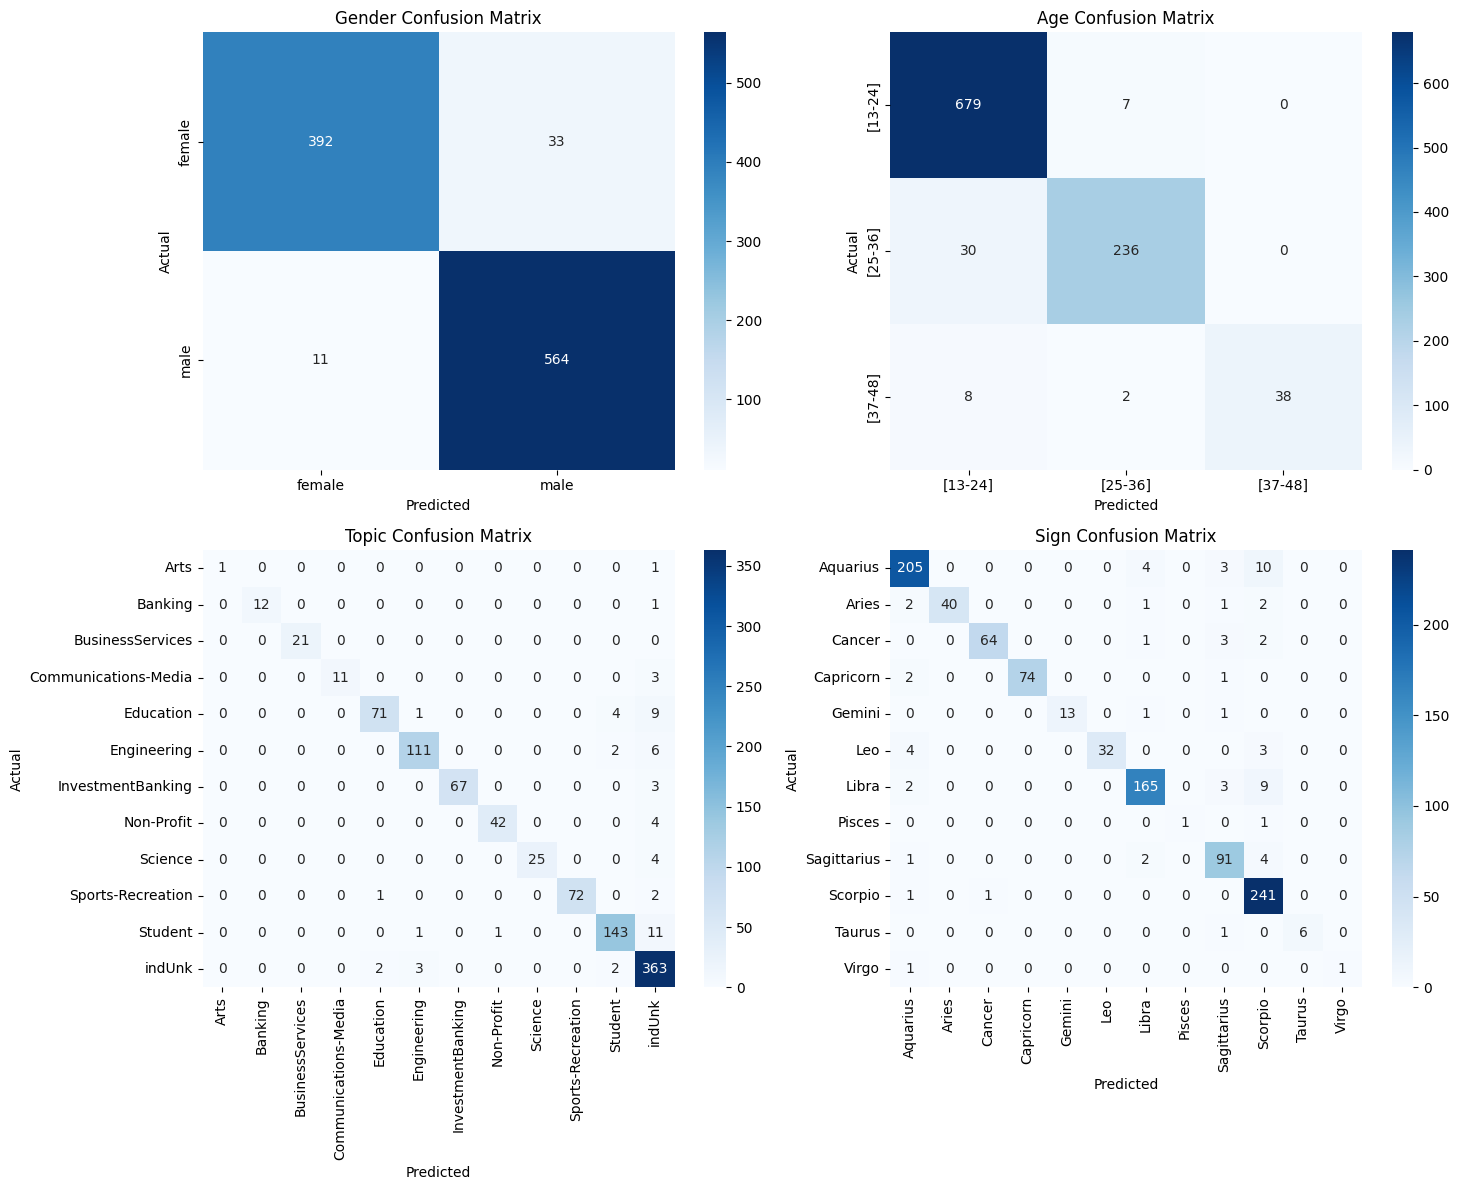

In [117]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# Replace df with your actual DataFrame name

# Define all unique classes for each column
gender_classes = sorted(new_data['gender'].unique())
age_classes = sorted(new_data['age'].unique())
topic_classes = sorted(new_data['topic'].unique())
sign_classes = sorted(new_data['sign'].unique())

# Confusion matrix for gender
gender_actual = new_data['gender']
gender_predicted = new_data['gender_pred']
gender_conf_matrix = confusion_matrix(gender_actual, gender_predicted, labels=gender_classes)

# Confusion matrix for age
age_actual = new_data['age']
age_predicted = new_data['age_pred']
age_conf_matrix = confusion_matrix(age_actual, age_predicted, labels=age_classes)

# Confusion matrix for topic
topic_actual = new_data['topic']
topic_predicted = new_data['topic_pred']
topic_conf_matrix = confusion_matrix(topic_actual, topic_predicted, labels=topic_classes)

# Confusion matrix for sign
sign_actual = new_data['sign']
sign_predicted = new_data['sign_pred']
sign_conf_matrix = confusion_matrix(sign_actual, sign_predicted, labels=sign_classes)

# Plot confusion matrices
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
sns.heatmap(gender_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=gender_classes, yticklabels=gender_classes)
plt.title('Gender Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(2, 2, 2)
sns.heatmap(age_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=age_classes, yticklabels=age_classes)
plt.title('Age Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(2, 2, 3)
sns.heatmap(topic_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=topic_classes, yticklabels=topic_classes)
plt.title('Topic Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(2, 2, 4)
sns.heatmap(sign_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sign_classes, yticklabels=sign_classes)
plt.title('Sign Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [120]:
new_data.head()

,id,gender,age,topic,sign,date,text,gender_pred,topic_pred,sign_pred,age_encoded,age_pred
0,2059027,male,[13-24],Student,Leo,"14,May,2004",info found 100 pages 45 mb pdf files wait unti...,male,Student,Leo,0,[13-24]
1,2059027,male,[13-24],Student,Leo,"13,May,2004",team members drewes van der laag urllink mail ...,male,Student,Leo,0,[13-24]
2,2059027,male,[13-24],Student,Leo,"12,May,2004",het kader van kernfusie op aarde maak je eigen...,male,Student,Leo,0,[13-24]
3,2059027,male,[13-24],Student,Leo,"12,May,2004",testing testing,male,Student,Leo,0,[13-24]
4,3581210,male,[25-36],InvestmentBanking,Aquarius,"11,June,2004",thanks yahoos toolbar capture urls popupswhich...,male,InvestmentBanking,Aquarius,1,[25-36]


In [119]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# Replace df with your actual DataFrame name

# Function to plot ROC curve and calculate AUC
def plot_roc_auc(y_true, y_score, column_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - ' + column_name)
    plt.legend(loc="lower right")
    plt.show()

# Assuming you have probabilities for each class
# Replace 'prob_' with your actual column name containing probabilities
# Make sure you have binary labels for each class

# ROC AUC curve for gender
plot_roc_auc(new_data['gender'], new_data['gender_prob'], 'Gender')

# ROC AUC curve for age
plot_roc_auc(new_data['age'], new_data['age_prob'], 'Age')

# ROC AUC curve for topic
plot_roc_auc(new_data['topic'], new_data['topic_prob'], 'Topic')

# ROC AUC curve for sign
plot_roc_auc(new_data['sign'], new_data['sign_prob'], 'Sign')

KeyError: 'gender_prob'